# Instacart Basket Analysis 
#### Table of Contents 

01. Libraries Import
02. Dataframe Import
03. Addressing PII Data
04. Regional Breakdown 
05. Identifying and Excluding Low-activity Customers
06. Customer Profiling and Deriving Columns 
- 6.1 Generational
- 6.2 Income Categories 
- 6.3 Parental status
- 6.4 Family status 
- 6.5 Day of the Week Clean-up
- 6.6 Department Clarification
- 6.7 Addressing Missing Data from a Previous Process - Price Ranges
7. Visualizations 
- 7.1 Generations of Customers
- 7.2 Income Ranges
- 7.3 Parental Status
- 7.4 Family Status 
- 7.5 Customer Brand Loyalty 
- 7.6 Price-Range
8. Aggregating Variables on a Customer-Profile Level 
- 8.1 Generations
- 8.2 Income Ranges
- 8.3 Parental Status 
- 8.4 Family Status 
9. Comparing Customer Profiles with Regions and Departments 
- 9.1 Regional Breakdown
- 8.2 Generations & Departments
- 8.3 Income Comparisons
- 8.4 Family Status
- 8.5 Parental Status
- 8.6 Loyalty Status
- 8.7 Department Popularity

# 01. Libraries Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Dataframe Import

### Q1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis\02 Data'

In [3]:
# Importing merged dataframe

df_opc = pd.read_pickle(os.path.join(path, 'Prepd Data', 'opc.pkl'))

In [4]:
df_opc.shape

(32641268, 31)

In [5]:
df_opc.dtypes

order_id                     int64
user_id                     object
order_number                 int16
orders_day_of_week           int16
order_hour_of_day            int16
days_since_prior_order     float16
first_order                   bool
product_id                 float32
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float16
prices                     float32
busiest_day               category
busiest_days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag              category
avg_price                  float16
spending_flag             category
order_frequency            float16
frequency_flag            category
Gender                      object
State                       object
Age                          int64
date_joined                 object
Dependants                   int64
Marital_status      

In [6]:
df_opc = df_opc.drop(columns = ['_merge'])

In [7]:
#To help with memory issue, need to change datatype for some columns that weren't previously changed (customer info)

df_opc['Age'] = df_opc['Age'].astype('int16')

In [8]:
df_opc['Dependants'] = df_opc['Dependants'].astype('int16')

In [9]:
df_opc['income'] = df_opc['income'].astype('int32')

In [10]:
df_opc['Gender'] = df_opc['Gender'].astype('category')

In [11]:
df_opc['State'] = df_opc['State'].astype('category')

In [12]:
df_opc['date_joined'] = df_opc['date_joined'].astype('category')

In [13]:
df_opc['Marital_status'] = df_opc['Marital_status'].astype('category')

In [14]:
#Checking that updates were successful

df_opc.dtypes

order_id                     int64
user_id                     object
order_number                 int16
orders_day_of_week           int16
order_hour_of_day            int16
days_since_prior_order     float16
first_order                   bool
product_id                 float32
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float16
prices                     float32
busiest_day               category
busiest_days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag              category
avg_price                  float16
spending_flag             category
order_frequency            float16
frequency_flag            category
Gender                    category
State                     category
Age                          int16
date_joined               category
Dependants                   int16
Marital_status      

# 03. Addressing PPII Data

### Q2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

A2 - While there are no names in the merged data that I have put together, user_id could still be used to get back to finding the actual individuals. Even if that's not the case, having combined the data of their gender, state, age, marital_status, dependants, and income, could be used to figure out who someone is. I would double check what the PII protocols for this situation are and work within them, even if it means having to remove some other columns.

# 04. Regional Breakdown

### Q3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [15]:
# Creating region lists based on the Wikipedia groupings

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

region_3 = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
# Creating a loop for regions 

result = []

for value in df_opc['State']:
    if value in region_1:
        result.append('Northeast')
    elif value in region_2:
        result.append('Midwest')
    elif value in region_3:
        result.append('South')
    elif value in region_4:
        result.append('West')
    else:
        result.append('Not in category')

In [17]:
# Adding regional data to df 

df_opc['Region'] = result

In [18]:
df_opc['Region'].value_counts()

South        10870719
West          8353182
Midwest       7652535
Northeast     5764832
Name: Region, dtype: int64

In [19]:
# Check to make sure all states are properly labeled by checking value counts

10229198+8994703+7652535+5764832

32641268

In [20]:
# Check to make sure length of states matches region count
len(df_opc['State'])

32641268

In [21]:
#Change region dtype to category

df_opc['Region'] = df_opc['Region'].astype('category')

In [22]:
# Creating crosstab for spending habits of different regions

crosstab = pd.crosstab(df_opc['Region'], df_opc['spending_flag'], dropna = False)

In [23]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,157347,7495188
Northeast,109140,5655692
South,211679,10659040
West,161834,8191348


In [24]:
# Determining high spending population percentage in Midwest

7495188+157347

7652535

In [25]:
Midwest=(157347/7652535)*100

In [26]:
Midwest

2.05614218033632

In [27]:
# Determining high spending population percentage in Northeast

5655692+109140

5764832

In [28]:
Northeast=(109140/5655692)*100

In [29]:
Northeast

1.9297373336454673

In [30]:
# Determining high spending population percentage in South

10034243+194955

10229198

In [31]:
South=(194955/10034243)*100

In [32]:
South

1.9428969380151546

In [33]:
# Determining high spending population percentage in West

8816145+178558

8994703

In [34]:
West=(178558/8816145)*100

In [35]:
West

2.025352350715647

There's a small difference between the regions when it comes to spending habits. The Midwest and West have the highest percentage of high spenders at 2.056% and 2.025%, respectively. The South and Northeast have the lowest percentage at 1.943% and 1.93%, respectively. This is interesting because cost of living tends to be higher on the coasts, so I would've expected West and Northeast to be the top two, rather than 2nd and 4th. Perhaps there's larger families in the Midwest and South and smaller/less families in the other two regions, thus making things more even in spending. Definitely something worth looking closer at.

# 05. Identifying and Excluding Low-activity Customers

### Q4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [36]:
# Creating a low-activity flag 

# Creating the conditions with loc function

df_opc.loc[df_opc['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'
df_opc.loc[df_opc['max_order'] >= 5, 'exclusion_flag'] = 'regular customer'

In [37]:
# Checking the exclusion flag 

df_opc['exclusion_flag'].value_counts(dropna = False)

regular customer         31929979
low activity customer      711289
Name: exclusion_flag, dtype: int64

In [38]:
# Creating a subset of customers to be excluded

df_low_activity = df_opc[df_opc['exclusion_flag'] == 'low activity customer']

In [39]:
# Checking for errors, max_order values should be < 5 

df_low_activity['max_order'].value_counts()

4    711289
Name: max_order, dtype: int64

In [40]:
# Exporting sample 

df_low_activity.to_csv(os.path.join(path, 'Prepd Data', 'low_activity.csv'))

In [41]:
# Create a new data frame without the low activity customers 

df_final = df_opc[df_opc['exclusion_flag'] == 'regular customer']

In [42]:
# Checking whether exclusion was successful

df_final['exclusion_flag'].value_counts() 

regular customer    31929979
Name: exclusion_flag, dtype: int64

In [43]:
df_final.shape

(31929979, 32)

In [44]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,State,Age,date_joined,Dependants,Marital_status,income,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular customer
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular customer
2,2539329,1,1,2,8,NaN,True,12427.0,3.0,0.0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular customer
3,2539329,1,1,2,8,NaN,True,26088.0,4.0,0.0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular customer
4,2539329,1,1,2,8,NaN,True,26405.0,5.0,0.0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular customer


# 06. Customer Profiling and Deriving Columns 

### Q5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [45]:
# Refresh on the potential variables

df_final.dtypes

order_id                     int64
user_id                     object
order_number                 int16
orders_day_of_week           int16
order_hour_of_day            int16
days_since_prior_order     float16
first_order                   bool
product_id                 float32
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float16
prices                     float32
busiest_day               category
busiest_days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag              category
avg_price                  float16
spending_flag             category
order_frequency            float16
frequency_flag            category
Gender                    category
State                     category
Age                          int16
date_joined               category
Dependants                   int16
Marital_status      

### 6.1 Generational

In [46]:
# Creating age groups based on Generations (Source: https://www.mentalfloss.com/article/609811/age-ranges-millennials-and-generation-z)
# Previously found max age is 81 and min age is 18

df_final.loc[df_final['Age'] < 25, 'Generation'] = 'Gen_Z'
df_final.loc[(df_final['Age'] >= 25) & (df_final['Age'] <= 40), 'Generation'] = 'Millennials'
df_final.loc[(df_final['Age'] >= 41) & (df_final['Age'] <= 56), 'Generation'] = 'Gen_X'
df_final.loc[(df_final['Age'] >= 57) & (df_final['Age'] <= 75), 'Generation'] = 'Boomers'
df_final.loc[df_final['Age'] >= 76, 'Generation'] = 'Silent_Gen'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [47]:
df_final['Generation'].value_counts()

Boomers        9379352
Gen_X          8046389
Millennials    7975166
Gen_Z          3522568
Silent_Gen     3006504
Name: Generation, dtype: int64

In [48]:
# Checking new variables saved to df

df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'order_frequency', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'Dependants', 'Marital_status', 'income',
       'Region', 'exclusion_flag', 'Generation'],
      dtype='object')

### 6.2 Income Categories

In [49]:
# Creating groups for income brackets

df_final.loc[df_final['income'] < 50000, 'income_range'] = '0 - 50k'
df_final.loc[(df_final['income'] >= 50000) & (df_final['income'] < 100000), 'income_range'] = '050-100k'
df_final.loc[(df_final['income'] >= 100000) & (df_final['income'] < 150000), 'income_range'] = '100-150k'
df_final.loc[(df_final['income'] >= 150000) & (df_final['income'] < 200000), 'income_range'] = '150-200k'
df_final.loc[(df_final['income'] >= 200000) & (df_final['income'] < 300000), 'income_range'] = '200-300k'
df_final.loc[(df_final['income'] >= 300000), 'income_range'] = 'Over 300k'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [50]:
df_final['income_range'].value_counts().sort_index()

0 - 50k       3511073
050-100k     13799255
100-150k     10618781
150-200k      3743090
200-300k       156413
Over 300k      101367
Name: income_range, dtype: int64

In [51]:
# Checking new variable saved to df

df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'order_frequency', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'Dependants', 'Marital_status', 'income',
       'Region', 'exclusion_flag', 'Generation', 'income_range'],
      dtype='object')

### 6.3 Parental Status

In [52]:
# Checking the frequency of dependants column

df_final['Dependants'].value_counts().sort_index()

0    7979527
1    7961567
2    7974823
3    8014062
Name: Dependants, dtype: int64

In [53]:
# Create conditions with loc function 

df_final.loc[df_final['Dependants'] == 0, 'parental_status'] = 'not parent'
df_final.loc[df_final['Dependants'] >= 1, 'parental_status'] = 'parent'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [54]:
# Checking parental_status column 

df_final['parental_status'].value_counts(dropna = False)

parent        23950452
not parent     7979527
Name: parental_status, dtype: int64

### 6.4 Family Status

In [55]:
# Checking the variable numbers

df_final['Marital_status'].value_counts()

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: Marital_status, dtype: int64

### 6.5 Day of the Week Clean-up

In [56]:
# Creating day of week column with actual days using loc function 

df_final.loc[df_final['orders_day_of_week'] == 0, 'day'] = 'Saturday'
df_final.loc[df_final['orders_day_of_week'] == 1, 'day'] = 'Sunday'
df_final.loc[df_final['orders_day_of_week'] == 2, 'day'] = 'Monday'
df_final.loc[df_final['orders_day_of_week'] == 3, 'day'] = 'Tuesday'
df_final.loc[df_final['orders_day_of_week'] == 4, 'day'] = 'Wednesday'
df_final.loc[df_final['orders_day_of_week'] == 5, 'day'] = 'Thursday'
df_final.loc[df_final['orders_day_of_week'] == 6, 'day'] = 'Friday'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [57]:
# Checking weekday column 

df_final['day'].value_counts()

Saturday     6107725
Sunday       5572954
Friday       4428913
Thursday     4152834
Monday       4147880
Tuesday      3785966
Wednesday    3733707
Name: day, dtype: int64

### 6.6 Department Clarification

In [58]:
# Import department data 

df_dept = pd.read_csv(os.path.join(path, 'Orig Data', 'departments.csv'), index_col = False)

In [59]:
df_dept.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [60]:
# Transpose the table

# Check departments to help profiling variables soon

df_dept.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [61]:
# Creating new column for department names using loc function

df_final.loc[df_final['department_id'] == 1, 'department'] = 'frozen'
df_final.loc[df_final['department_id'] == 2, 'department'] = 'other'
df_final.loc[df_final['department_id'] == 3, 'department'] = 'bakery'
df_final.loc[df_final['department_id'] == 4, 'department'] = 'produce'
df_final.loc[df_final['department_id'] == 5, 'department'] = 'alcohol'
df_final.loc[df_final['department_id'] == 6, 'department'] = 'international'
df_final.loc[df_final['department_id'] == 7, 'department'] = 'beverages'
df_final.loc[df_final['department_id'] == 8, 'department'] = 'pets'
df_final.loc[df_final['department_id'] == 9, 'department'] = 'dry goods pasta'
df_final.loc[df_final['department_id'] == 10, 'department'] = 'bulk'
df_final.loc[df_final['department_id'] == 11, 'department'] = 'personal care'
df_final.loc[df_final['department_id'] == 12, 'department'] = 'meat seafood'
df_final.loc[df_final['department_id'] == 13, 'department'] = 'pantry'
df_final.loc[df_final['department_id'] == 14, 'department'] = 'breakfast'
df_final.loc[df_final['department_id'] == 15, 'department'] = 'canned goods'
df_final.loc[df_final['department_id'] == 16, 'department'] = 'dairy eggs'
df_final.loc[df_final['department_id'] == 17, 'department'] = 'households'
df_final.loc[df_final['department_id'] == 18, 'department'] = 'babies'
df_final.loc[df_final['department_id'] == 19, 'department'] = 'snacks'
df_final.loc[df_final['department_id'] == 20, 'department'] = 'deli'
df_final.loc[df_final['department_id'] == 21, 'department'] = 'missing'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
# Checking the new department column 

df_final['department'].value_counts()

produce            9288860
dairy eggs         5292745
snacks             2829767
beverages          2633114
frozen             2180787
pantry             1831123
bakery             1147983
canned goods       1041171
deli               1028707
dry goods pasta     845368
households          720087
meat seafood        692678
breakfast           687659
personal care       436395
babies              417536
international       262920
alcohol             149309
pets                 95470
missing              67034
other                35403
bulk                 34011
Name: department, dtype: int64

### 6.7 Addressing Missing Data from a Previous Process - Price Ranges

In [63]:
# Copying from 4.7 with df name update

# Creating price range flags with loc() function

df_final.loc[df_final['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_final.loc[(df_final['prices'] <= 15) & (df_final['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df_final.loc[df_final['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [64]:
df_final['price_range_loc'].value_counts(dropna = False)

Mid-range product     21399096
Low-range product      9910695
High-range product      408336
NaN                     211852
Name: price_range_loc, dtype: int64

In [65]:
# After seeing NaN in the price_range, need to remove those values.

# Create a subset with NaN values to exclude

df_price_nan = df_final[df_final['price_range_loc'] == 'NaN']

In [66]:
# Checking whether all values in price_nan are NaN in this subset 

df_price_nan['price_range_loc'].value_counts()

Series([], Name: price_range_loc, dtype: int64)

In [67]:
# Exporting the sample

df_price_nan.to_csv(os.path.join(path, 'Prepd Data', 'low_activity.csv'))

In [68]:
# Updating df without the NaN prices

df_final = df_final.dropna()

In [69]:
df_final.shape

(29869498, 38)

In [70]:
df_final['price_range_loc'].value_counts(dropna = False)

Mid-range product     20153364
Low-range product      9332538
High-range product      383596
Name: price_range_loc, dtype: int64

# 07. Visualizations

### Q6 - Create an appropriate visualization to show the distribution of profiles.

### 7.1 Generations of Customers

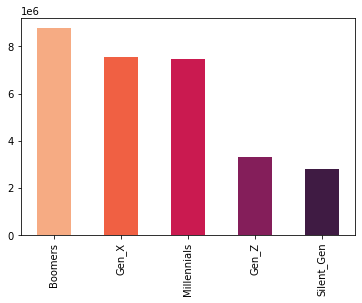

In [71]:
# Creating a bar chart

bar_generation = df_final['Generation'].value_counts().plot.bar(color = sns.color_palette('rocket_r', 5))

In [72]:
# Creating a new path to download visualizations

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis'

In [73]:
# Exporting visualization

bar_generation.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_generation.png'))

### 7.2 Income Ranges

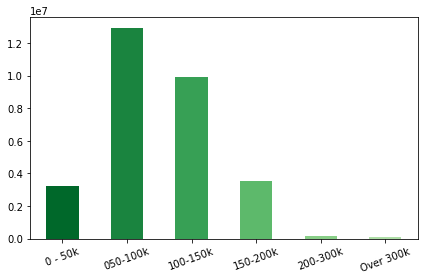

In [74]:
# Creating a bar chart that represents total orders across categories 

bar_income_orders = df_final['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette('Greens_r', 8))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [75]:
# Export visualization 

bar_income_orders.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_income_orders.png'))

### 7.3 Parental Status

(array([0, 1]), [Text(0, 0, 'parent'), Text(1, 0, 'not parent')])

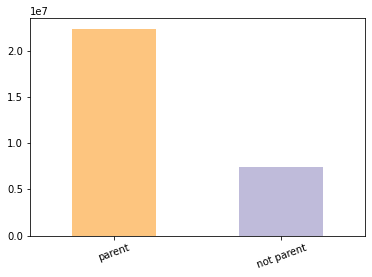

In [76]:
# Creating a bar chart for total orders by parental status 

bar_parental_status = df_final['parental_status'].value_counts().plot.bar(color = sns.color_palette('PuOr',2))
plt.xticks(rotation= 20, horizontalalignment="center")

Text(0, 0.5, '')

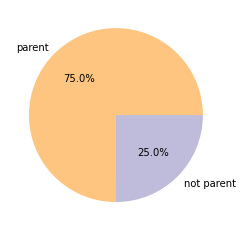

In [77]:
# Creating a pie chart of distribution of customers in terms of parental status (Googled how to get rid of the label on the left)

pie_parental_status = df_final['parental_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('PuOr',2))
plt.ylabel('')

### 7.4 Family Status

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

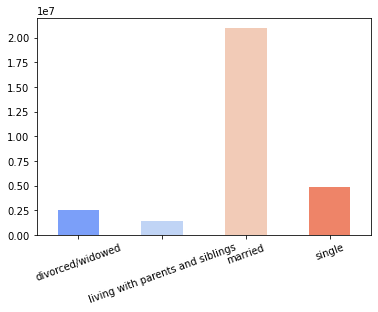

In [78]:
# Creating a bar chart of total orders by family status 

bar_family = df_final['Marital_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('coolwarm', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

Text(0, 0.5, '')

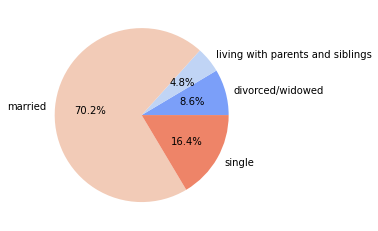

In [79]:
# Creating a pie chart to show distribution of customers in terms of family status 

pie_family = df_final['Marital_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 4))
plt.ylabel('')

In [80]:
# Export Visualizations

bar_family.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_family.png'))

In [81]:
pie_family.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'pie_family.png'))

### 7.5 Customer Brand Loyalty

Text(0, 0.5, '')

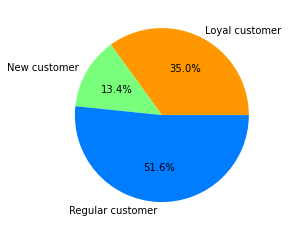

In [82]:
# Distribution among customers in regards to brand loyalty 

pie_loyalty = df_final['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('jet_r',3))
plt.ylabel('')

In [83]:
# Is there a difference in ordering habits by brand loyalty?

# Creating a crosstab

In [84]:
crosstab_loyalty_price = pd.crosstab(df_final['loyalty_flag'], df_final['price_range_loc'], dropna = False)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

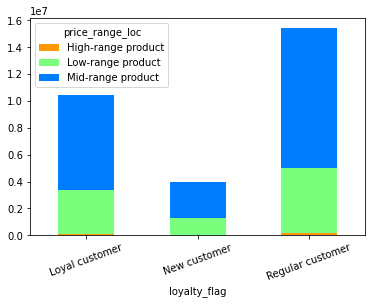

In [85]:
# Creating a stacked bar chart  

bar_loyalty_price = crosstab_loyalty_price.plot(kind = 'bar', stacked = True, color = sns.color_palette('jet_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

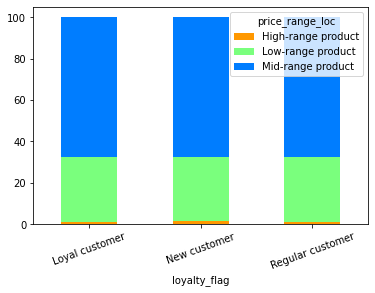

In [86]:
# Trying a 100% stacked bar chart to show better for price ranges

bar_loyalty_price_100 = crosstab_loyalty_price.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('jet_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")

In [87]:
# Exporting visualizations

pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'pie_loyalty.png'))

In [88]:
bar_loyalty_price.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_loyalty_price.png'))

In [89]:
bar_loyalty_price_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_loyalty_price_100.png'))

### 7.6 Price-Range

In [90]:
# Is there certain product ranges that are more popular by income ranges? 

# Creating a crosstab

crosstab_product_income = pd.crosstab(df_final['income_range'], df_final['price_range_loc'], dropna = False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 50k'),
  Text(1, 0, '050-100k'),
  Text(2, 0, '100-150k'),
  Text(3, 0, '150-200k'),
  Text(4, 0, '200-300k'),
  Text(5, 0, 'Over 300k')])

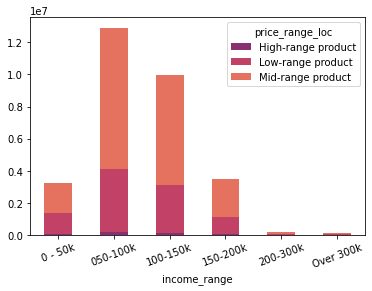

In [91]:
# Creating a stacked bar chart  

bar_product_income = crosstab_product_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('flare_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 50k'),
  Text(1, 0, '050-100k'),
  Text(2, 0, '100-150k'),
  Text(3, 0, '150-200k'),
  Text(4, 0, '200-300k'),
  Text(5, 0, 'Over 300k')])

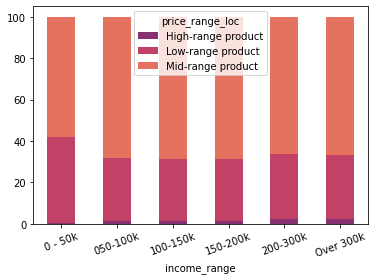

In [92]:
# Trying a 100% stacked bar chart to show better for income ranges

bar_product_income_100 = crosstab_product_income.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('flare_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")

Text(0, 0.5, '')

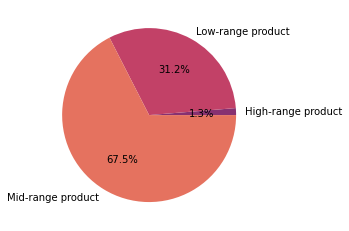

In [93]:
# Pie chart for price range groupings

pie_price_range = df_final['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('flare_r', 3))
plt.ylabel('')

In [94]:
# Exporting Visualizations

bar_product_income.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_product_income.png'))

In [95]:
bar_product_income_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_product_income_100.png'))

In [96]:
pie_price_range.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'pie_price_range.png'))

# 08. Aggregating Variables on a Customer-Profile Level

### Q7- Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [97]:
# Refresh on categories 

df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'order_frequency', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'Dependants', 'Marital_status', 'income',
       'Region', 'exclusion_flag', 'Generation', 'income_range',
       'parental_status', 'day', 'department', 'price_range_loc'],
      dtype='object')

### 8.1 Generations

In [98]:
# Expenditure by generations

expenditure_generations = df_final.groupby('Generation').agg({'prices': ['mean', 'min', 'max']})

In [99]:
expenditure_generations

prices              
                  mean  min      max
Generation                          
Boomers      11.922747  1.0  99999.0
Gen_X        11.795639  1.0  99999.0
Gen_Z        12.469719  1.0  99999.0
Millennials  11.906481  1.0  99999.0
Silent_Gen   12.110178  1.0  99999.0

In [105]:
expenditure_generations.to_clipboard()

In [106]:
# Usage frequency by generation 

usage_frequency_gen = df_final.groupby('Generation').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [107]:
usage_frequency_gen

days_since_prior_order           
                              mean  min   max
Generation                                   
Boomers                  10.953125  0.0  30.0
Gen_X                    10.976562  0.0  30.0
Gen_Z                    10.921875  0.0  30.0
Millennials              11.000000  0.0  30.0
Silent_Gen               10.984375  0.0  30.0

In [108]:
usage_frequency_gen.to_clipboard()

### 8.2 Income Ranges

In [109]:
# Expenditure by income income categories 

expenditure_income = df_final.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

In [110]:
expenditure_income

prices              
                    mean  min      max
income_range                          
0 - 50k         6.703143  1.0     25.0
050-100k        8.437807  1.0  99999.0
100-150k       10.417650  1.0  99999.0
150-200k       17.046633  1.0  99999.0
200-300k      251.751404  1.0  99999.0
Over 300k     267.225586  1.0  99999.0

In [111]:
expenditure_income.to_clipboard()

In [112]:
# Usage frequency by income ranges

usage_frequency_income = df_final.groupby('income_range').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [113]:
usage_frequency_income

days_since_prior_order           
                               mean  min   max
income_range                                  
0 - 50k                   11.390625  0.0  30.0
050-100k                  10.921875  0.0  30.0
100-150k                  10.953125  0.0  30.0
150-200k                  10.867188  0.0  30.0
200-300k                  10.148438  0.0  30.0
Over 300k                 10.164062  0.0  30.0

In [114]:
usage_frequency_income.to_clipboard()

### 8.3 Parental Status

In [115]:
# Expenditure by parental status 

expenditure_parent = df_final.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [116]:
expenditure_parent

prices              
                      mean  min      max
parental_status                         
not parent       12.085102  1.0  99999.0
parent           11.924488  1.0  99999.0

In [117]:
expenditure_parent.to_clipboard()

In [118]:
# Usage frequency by parental status

usage_frequency_parent = df_final.groupby('parental_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [119]:
usage_frequency_parent

days_since_prior_order           
                                  mean  min   max
parental_status                                  
not parent                   10.945312  0.0  30.0
parent                       10.976562  0.0  30.0

In [120]:
usage_frequency_parent.to_clipboard()

### 8.4 Family Status

In [121]:
# Expenditure by family status 

expenditure_fam = df_final.groupby('Marital_status').agg({'prices': ['mean', 'min', 'max']})

In [122]:
expenditure_fam

prices              
                                       mean  min      max
Marital_status                                           
divorced/widowed                  11.444293  1.0  99999.0
living with parents and siblings  10.787795  1.0  99999.0
married                           12.002018  1.0  99999.0
single                            12.418473  1.0  99999.0

In [123]:
expenditure_fam.to_clipboard()

In [124]:
# Usage frequency by family status 

usage_frequency_fam = df_final.groupby('Marital_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [125]:
usage_frequency_fam

days_since_prior_order           
                                                   mean  min   max
Marital_status                                                    
divorced/widowed                              10.914062  0.0  30.0
living with parents and siblings              10.914062  0.0  30.0
married                                       10.984375  0.0  30.0
single                                        10.968750  0.0  30.0

In [126]:
usage_frequency_fam.to_clipboard()

# 09. Comparing Customer Profiles with Regions and Departments 

### Q8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### 9.1 Regional Breakdown

Text(0, 0.5, '')

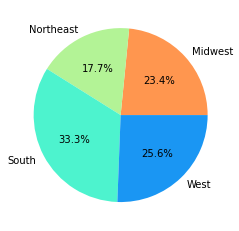

In [127]:
# Pie chart for regional breakdown

pie_region = df_final['Region'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('rainbow_r', 4))
plt.ylabel('')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

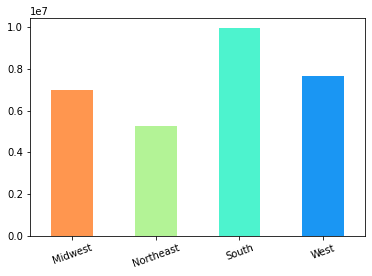

In [128]:
# Creating a bar chart for regional breakdown

region_bar = df_final['Region'].value_counts().sort_index().plot.bar(color = sns.color_palette('rainbow_r', 4))

plt.xticks(rotation= 20, horizontalalignment="center")

In [129]:
# What days of the week are more popular by region?

# Creating a crosstab

crosstab_days_region = pd.crosstab(df_final['day'], df_final['Region'], dropna = False)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

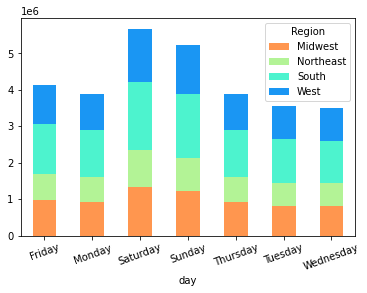

In [130]:
# Creating a stacked bar chart  

bar_days_region = crosstab_days_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

In [131]:
crosstab_gen_region = pd.crosstab(df_final['Generation'], df_final['Region'], dropna = False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Boomers'),
  Text(1, 0, 'Gen_X'),
  Text(2, 0, 'Gen_Z'),
  Text(3, 0, 'Millennials'),
  Text(4, 0, 'Silent_Gen')])

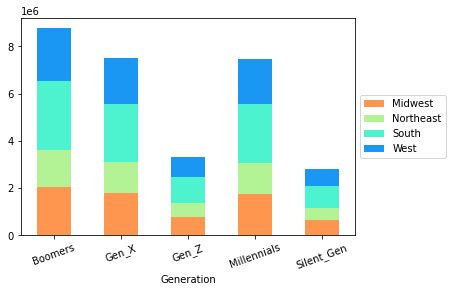

In [132]:
# Creating a stacked bar chart 

bar_crosstab_gen_region = crosstab_gen_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Boomers'),
  Text(1, 0, 'Gen_X'),
  Text(2, 0, 'Gen_Z'),
  Text(3, 0, 'Millennials'),
  Text(4, 0, 'Silent_Gen')])

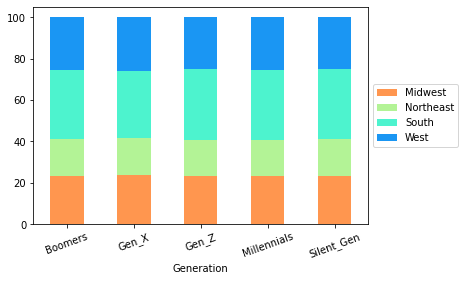

In [133]:
# A 100% stacked bar chart 

bar_crosstab_gen_region_100 = crosstab_gen_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")

In [134]:
# Creating a crosstab of deptartment sales regionally

crosstab_region_dept = pd.crosstab(df_final['department'], df_final['Region'], dropna = False)

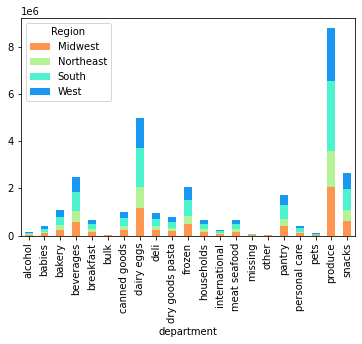

In [135]:
# Creating a stacked bar chart 

bar_region_dept = crosstab_region_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))

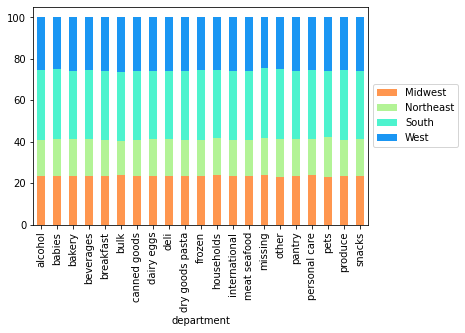

In [136]:
# Creating a 100% stacked bar chart 

bar_region_dept_100 = crosstab_region_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [137]:
# Exporting Visualizations

pie_region.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'pie_region.png'))

In [138]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_region.png'))

In [139]:
bar_days_region.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_days_region.png'))

In [140]:
bar_crosstab_gen_region.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_gen_region.png'))

In [141]:
bar_crosstab_gen_region_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_gen_region_100.png'))

In [142]:
bar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_region_dept.png'))

In [143]:
bar_region_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_region_dept_100.png'))

### 9.2 Generation & Departments

In [144]:
# Creating a crosstab for generations and departments 

crosstab_gen_dept = pd.crosstab(df_final['department'], df_final['Generation'], dropna = False)

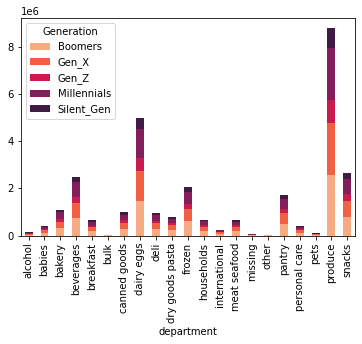

In [145]:
# Stacked bar chart 

bar_crosstab_gen_dept = crosstab_gen_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('rocket_r', 5))

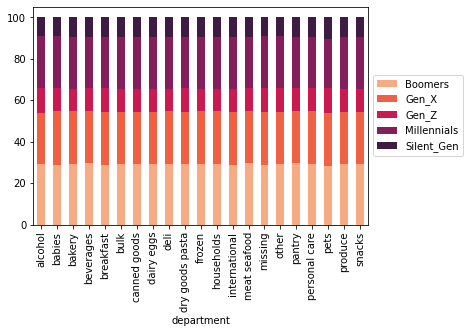

In [146]:
# Creating a 100% stacked bar chart 

bar_crosstab_gen_dept_100 = crosstab_gen_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rocket_r',5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [147]:
# Export visuals 

bar_crosstab_gen_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_gen_dept.png'))

In [148]:
bar_crosstab_gen_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_gen_dept_100.png'))

### 9.3 Income Comparisons

#### Income & Region

In [149]:
# Creating a crosstab for income_categories and region

crosstab_income_region = pd.crosstab(df_final['income_range'], df_final['Region'], dropna = False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 50k'),
  Text(1, 0, '050-100k'),
  Text(2, 0, '100-150k'),
  Text(3, 0, '150-200k'),
  Text(4, 0, '200-300k'),
  Text(5, 0, 'Over 300k')])

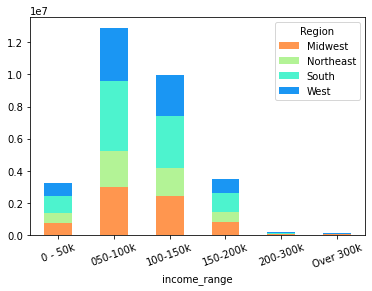

In [150]:
# Creating a stacked bar chart 

bar_crosstab_income_region = crosstab_income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 50k'),
  Text(1, 0, '050-100k'),
  Text(2, 0, '100-150k'),
  Text(3, 0, '150-200k'),
  Text(4, 0, '200-300k'),
  Text(5, 0, 'Over 300k')])

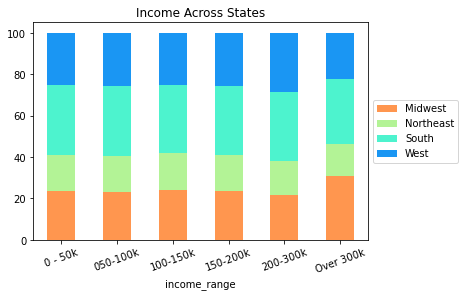

In [151]:
# Creating a 100% stacked bar chart 

bar_crosstab_income_region_100 = crosstab_income_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.title('Income Across States')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")

In [152]:
# Exporting visuals

bar_crosstab_income_region.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_income_region.png'))

In [153]:
bar_crosstab_income_region_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_income_region_100.png'))

#### Income & Departments

In [154]:
# Creating a crosstab for income and department 

crosstab_income_dept = pd.crosstab(df_final['department'], df_final['income_range'], dropna = False)

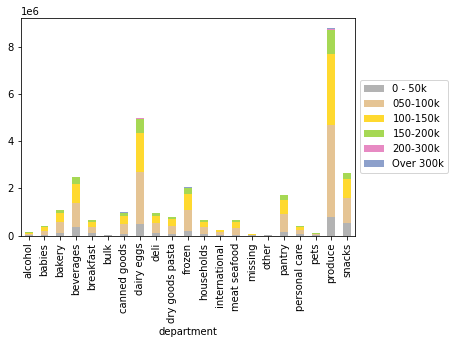

In [155]:
# Creating a stacked bar chart 

bar_crosstab_income_dept = crosstab_income_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2_r', 8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

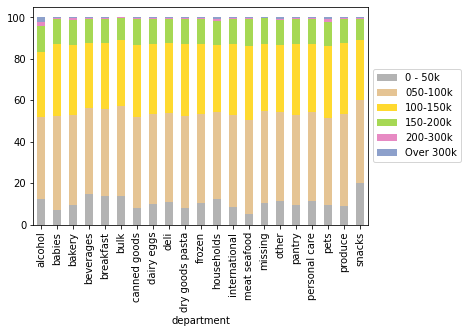

In [156]:
# Creating a 100% stacked bar chart 

bar_crosstab_income_dept_100 = crosstab_income_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2_r', 8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [157]:
# Export visuals

bar_crosstab_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_income_dept.png'))

In [158]:
bar_crosstab_income_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_income_dept_100.png'))

### 9.4 Family Status

#### Family Status & Region

In [159]:
# Creating a crosstab for family status regionally

crosstab_family_region = pd.crosstab(df_final['Marital_status'], df_final['Region'], dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

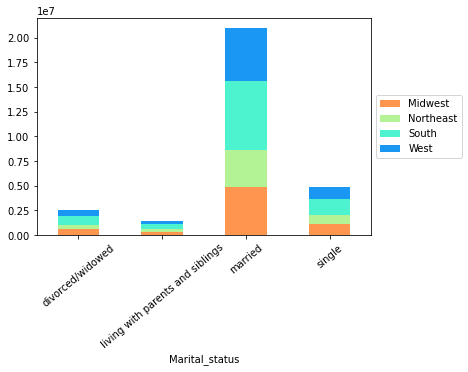

In [160]:
# Creating a stacked bar chart

bar_family_region_ = crosstab_family_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 40, horizontalalignment="center")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

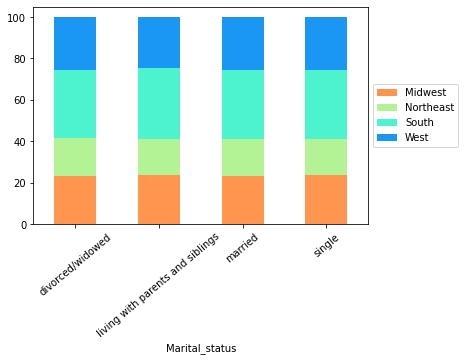

In [161]:
# Creating a 100% stacked bar chart 

bar_family_region_100 = crosstab_family_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 40, horizontalalignment="center")

#### Family Status & Departments

In [162]:
# Creating a crosstab for family status and departments 

crosstab_dept_fam = pd.crosstab(df_final['department'], df_final['Marital_status'], dropna = False)

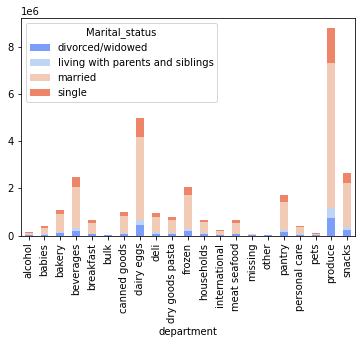

In [163]:
# Stacked bar chart

bar_dept_fam = crosstab_dept_fam.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 4))

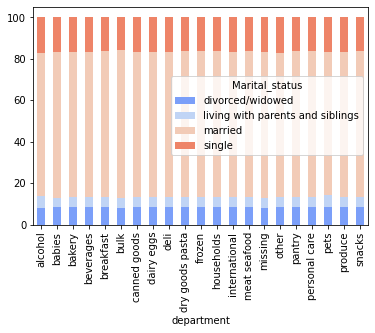

In [164]:
# Creating a 100% stacked bar chart

bar_dept_fam_100 = crosstab_dept_fam.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 4))

### 9.5 Parental Status

#### Parental Status Regionally

In [165]:
# Creating a crosstab for parental status regionally

crosstab_parent_region = pd.crosstab(df_final['parental_status'], df_final['Region'], dropna = False)

(array([0, 1]), [Text(0, 0, 'not parent'), Text(1, 0, 'parent')])

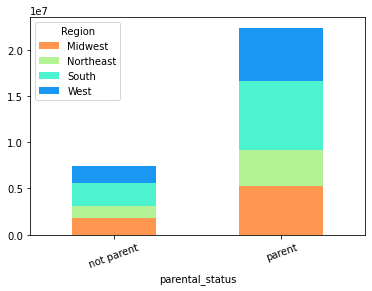

In [166]:
# Creating a stacked bar chart 

bar_parent_region = crosstab_parent_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1]), [Text(0, 0, 'not parent'), Text(1, 0, 'parent')])

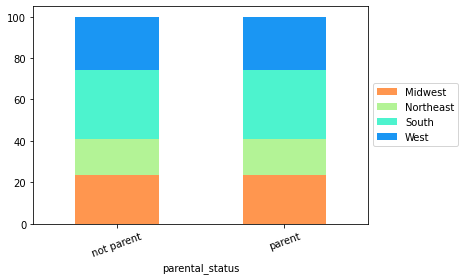

In [167]:
# Creating a 100 % Stacked Bar Chart

bar_parent_region_100 = crosstab_parent_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")

In [168]:
# Exporting visuals

bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_parent_region.png'))

In [169]:
bar_parent_region_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_parent_region_100.png'))

#### Parental Status & Departments

In [170]:
# Creating crosstab for parental status and departments

crosstab_parent_dept = pd.crosstab(df_final['department'], df_final['parental_status'], dropna = False)

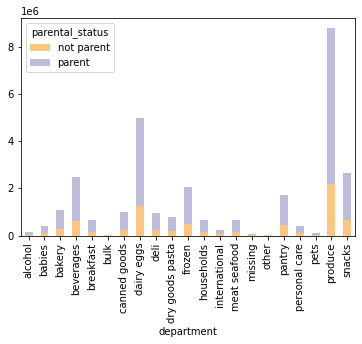

In [171]:
# Creating a stacked bar chart 

bar_parent_dept = crosstab_parent_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('PuOr',2))

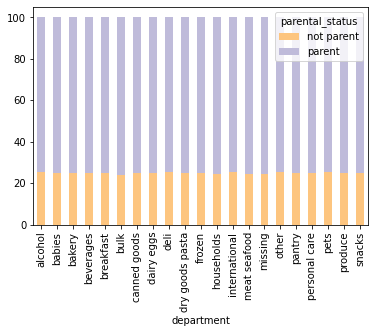

In [172]:
# Creating a 100% stacked bar chart 

bar_parent_dept_100 = crosstab_parent_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('PuOr',2))

In [173]:
# Exporting visuals

bar_parent_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_parent_dept.png'))

In [174]:
bar_parent_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_parent_dept_100.png'))

### 9.6 Loyalty Status

#### Loyalty & Departments

In [175]:
# Creating a crosstab for loyalty status and departments

crosstab_loyal_dept = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna = False)

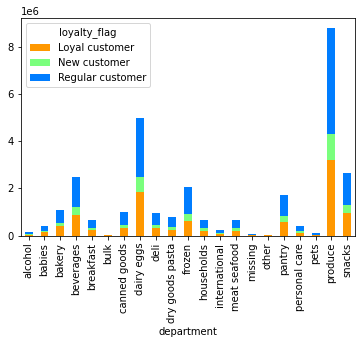

In [176]:
# Creating a stacked bar chart 

bar_loyal_dept = crosstab_loyal_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('jet_r',3))

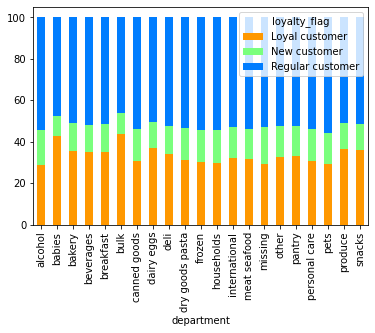

In [177]:
# Creating a 100 % stacked Bar Chart

bar_loyal_dept_100 = crosstab_loyal_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('jet_r',3))

In [178]:
bar_loyal_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_loyal_dept.png'))

In [179]:
bar_loyal_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_loyal_dept_100.png'))

### 9.7 Department Populatirty

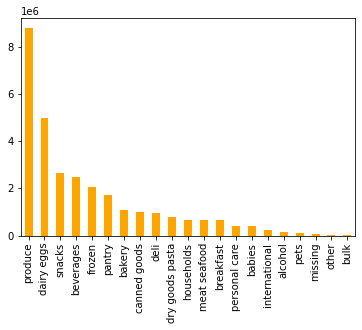

In [182]:
# Creating a bar chart of orders by department 

bar_dept = df_final['department'].value_counts().plot.bar(color = 'Orange')

In [183]:
#Exportin visual 

bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar__dept.png'))